# Instabot-2 Project

In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver=webdriver.Chrome()


In [4]:
#opening Instagram
driver.get('https://www.instagram.com/')


In [5]:
# Saving username and password as local variable
username='vibhanshubotke'
password='vibha2003'

In [6]:
# initialising wait object
wait=WebDriverWait(driver,10)

In [7]:
def login(username,password):
    try:
#     Finding username textbox and sending username.
        user_id=wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_id.send_keys(username)
#     Finding password textbox and sending password.
        pwd=driver.find_element(By.NAME,'password')
        pwd.send_keys(password)
#     Finding log in button.
        btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        btn.click()
    except TimeoutException :
        print ("lOGIN FAILED")
    

In [8]:
# login using username and password
login(username,password)

In [112]:
def search(s):
#         locating search button and clicking button
    search_btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="x1iyjqo2 xh8yej3"]/div[2]/span/div/a')))
    search_btn.click()
#         Waiting till presence of search bar and locating search text box 
    searchbox=wait.until(EC.element_to_be_clickable((By.XPATH, '//input[@placeholder="Search"]')))
    searchbox.clear()
    keyword = s
    searchbox.send_keys(keyword)
# Opening profile 
    profile_btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5 x18d9i69 xkhd6sd xh8yej3 x1iyjqo2 xocp1fn"]/div/a')))
    profile_btn.click()
#     close search panel
    end=driver.find_element(By.XPATH,'html/body')
    end.click()

In [97]:
# Top 10 handles when searched food
handles_list=['food_food_surat','food.of.vadodara','yourfoodlab','thesavouryspree','foodofvadodara','foodies.of.vadodara','foodtalkindia','foodculture_vadodara','surat_foodie','suratstreetfood']

## 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [150]:
# Extracting top 5 list from the handles obtained in the previous project
def top5list(lst):
    try:
        dct={}
        for i in lst:
#             Calling search function to open profile
            search(i)
            time.sleep(2)
#             locating followers of user
            follower = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="x78zum5 x1q0g3np xieb3on"]/li[2]/a/span')))
#             replacing ',' with '' and typecasting to int
            dct[i]=int(follower.get_attribute('title').replace(',',''))
#         top 5 most followed handles
        count=0
        res=OrderedDict()
        for i in sorted(dct,key=dct.get,reverse=True):
            res[i]=dct[i]
            count+=1
            if(count>=5):
                break
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")    

            

In [102]:
top_handles=top5list(handles_list)

In [103]:
for fname in top_handles:
    print(fname,'->',top_handles[fname])

yourfoodlab -> 2713470
foodtalkindia -> 309682
food_food_surat -> 125815
foodculture_vadodara -> 117614
surat_foodie -> 94937


### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [9]:
# number of post in last n days
def no_of_posts(day):
    try:
        
#         locating first post
        post=driver.find_element(By.XPATH,'//*[@class="_aabd _aa8k _aanf"]/a')
        post.click()
        count = 0 
        while True :
#             locating date and extracting it
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            date_string = temp.get_attribute('datetime')
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            time.sleep(2)
#             locating next button and clicking it to proceed to next post
            next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class=" _aaqg _aaqh"]/button')))
            next_but.click()
       #closing the post
        close=driver.find_element(By.XPATH,'//*[@class="x160vmok x10l6tqk x1eu8d0j x1vjfegm"]/div')
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")


In [118]:
total_post_count = {}
for i in top_handles :
    search(i)
    time.sleep(2)
    count = no_of_posts(3)
    total_post_count[i] = count

In [36]:
for i in total_post_count:
    print(i,total_post_count[i])

yourfoodlab 0
foodtalkindia 3
food_food_surat 0
foodculture_vadodara 0
surat_foodie 0


### 1.3 Depict this information using a suitable graph.

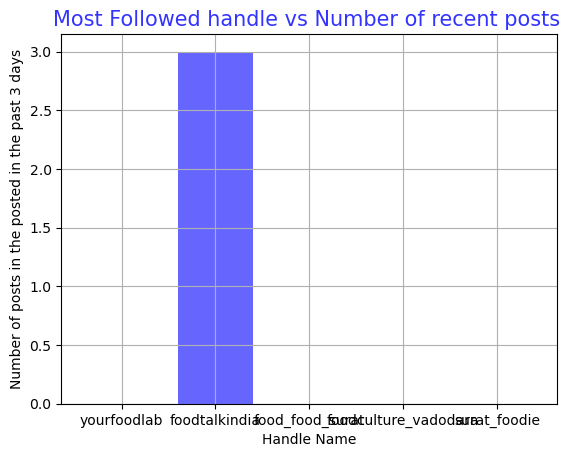

In [45]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='b',alpha=0.6)
plt.ylabel("Number of posts in the posted in the past 3 days",size=10)
plt.xlabel("Handle Name",size=10)
plt.title('Most Followed handle vs Number of recent posts ',fontsize=15, color='blue',alpha=0.8)
plt.grid()
plt.show()

## 2. Your friend also needs a list of hashtags that he should use in his posts.


### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [152]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts=driver.find_elements(By.XPATH,'//*[@class="_aabd _aa8k _aanf"]/a')
#             iterating over all 10 posts to extract its content
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH,'//*[@class="_aacl _aaco _aacu _aacx _aad7 _aade"]/a')
                for hashtag in hashtags:
                    #appending in list
                    k=hashtag.text
                    if(k[0]=='#'):
                        hashtags_list.append(hashtag.text)
#                         closing the post
                close=driver.find_element(By.XPATH,'//*[@class="x160vmok x10l6tqk x1eu8d0j x1vjfegm"]/div')
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [120]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [121]:
print(hashtags)

['#yourfoodlab', '#sanjyotkeer', '#foodporn', '#paneertikkasandwich', '#gutli', '#yourfoodlab', '#sanjyotkeer', '#thalipeeth', '#foodporn', '#yourfoodlab', '#sanjyotkeer', '#gattekisabzi', '#foodporn', '#instagram', '#EverestSpices', '#Everest', '#EverestShahiPaneerMasala', '#TasteMeinBestEverest', '#RestaurantStyleShahiPaneer', '#yourfoodlab', '#sanjyotkeer', '#crispychicken', '#foodporn', '#yourfoodlab', '#sanjyotkeer', '#dalpanchmel', '#foodporn', '#trufflefries', '#FrenchFriesDay', '#frenchfries', '#delhincr', '#flavours', '#snacks', '#foodtalkindia', '#delicious', '#yummy', '#discover', '#ftiinsider', '#worthmoney', '#delhincr', '#flavours', '#food', '#foodtalkindia', '#delicious', '#yummy', '#discover', '#heartyportions', '#delhi', '#food', '#wholesome', '#meals', '#flavours', '#food', '#foodtalkindia', '#delicious', '#yummy', '#discover', '#NewInTown', '#wolf', '#cocktaillab', '#delhi', '#globalcuisine', '#drinks', '#food', '#foodtalkindia', '#delicious', '#yummy', '#discover', 

### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [122]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#yummy 14
#food 13
#explorepage 11
#reelsinstagram 11
#foodtalkindia 10
#delicious 10
#discover 10
#foodculture_vadodara 9
#reels 8
#surat 7
#trending 7
#instagood 7
#fyp 7
#family 7
#friends 7
#kids 7
#love 6
#reelsindia 6
#reelkarofeelkaro 6
#reelitfeelit 6
#reelsvideo 6
#foodie 6
#yourfoodlab 5
#sanjyotkeer 5
#foodporn 5
#delhi 5
#viralvideos 5
#reelsviral 5
#vadodarafood 5
#vadodarafoodies 5
#iamsuratcity 5
#flavours 4
#drinks 4
#monsoon 4
#travel 4
#india 4
#suratfoodie 4
#instafood 3
#travelling 3
#travelblogger 3
#vadodara 3
#foods 3
#streetfood 3
#rainyday 3
#delhincr 2
#ftiinsider 2
#ChugAlongToTheHills 2
#cider 2
#hillstation 2
#ales 2
#summer 2
#mumbai 2
#kurkure 2
#gujarattourism 2
#viral 2
#trendingreels 2
#travelphotography 2
#nature 2
#explore 2
#fun 2
#chai 2
#instadaily 2
#spicy 2
#hummus 2
#suratfoodies 2
#paneertikkasandwich 1
#gutli 1
#thalipeeth 1
#gattekisabzi 1
#instagram 1
#EverestSpices 1
#Everest 1
#EverestShahiPaneerMasala 1
#TasteMeinBestEverest 1
#Restauran

### 2.3 Create a csv file with two columns : the word and its frequency

In [123]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#yummy,14
1,#food,13
2,#explorepage,11
3,#reelsinstagram,11
4,#foodtalkindia,10
5,#delicious,10
6,#discover,10
7,#foodculture_vadodara,9
8,#reels,8
9,#surat,7


### 2.4 Now, find the hashtags that were most popular among these bloggers

In [153]:
# most popular hashtag 
print(words_list[0][0])

#yummy


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

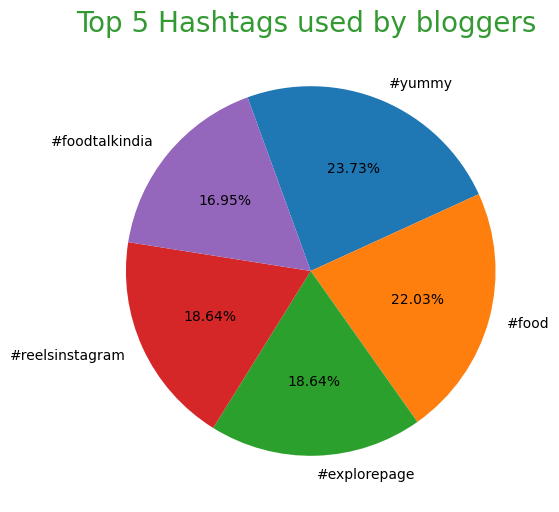

In [125]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

## 3. You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [154]:
def get_likes(user):
    try :
            likes = []
            #This function will search a user and open that profile
            search(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts=driver.find_elements(By.XPATH,'//*[@class="_aabd _aa8k _aanf"]/a')
            for post in posts[:10]:
                post.click()
                time.sleep(2)

                like=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="_ae5m _ae5n _ae5o"]/div/div/span/a/span/span')))
                no_of_likes = (like.text).replace(',' , '')
                likes.append(int(no_of_likes))
                time.sleep(1)
#                 closing the post
                close=driver.find_element(By.XPATH,'//*[@class="x160vmok x10l6tqk x1eu8d0j x1vjfegm"]/div')
                time.sleep(1)
                close.click()
            return likes
    except TimeoutException :
        print ("Something went wrong! Try Again")
                    

In [137]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of yourfoodlab :
30664 Likes
2625 Likes
50874 Likes
42337 Likes
50632 Likes
2894 Likes
9319 Likes
47538 Likes
21631 Likes
3755 Likes

Number of likes of the top 10 posts of foodtalkindia :
133 Likes
186 Likes
261 Likes
236 Likes
410 Likes
428 Likes
375 Likes
647 Likes
199 Likes
320 Likes

Number of likes of the top 10 posts of food_food_surat :
4441 Likes
1334 Likes
6572 Likes
853 Likes
1802 Likes
717 Likes
2567 Likes
2484 Likes
981 Likes
1836 Likes

Number of likes of the top 10 posts of foodculture_vadodara :
2688 Likes
3318 Likes
13120 Likes
533 Likes
1457 Likes
2877 Likes
921 Likes
708 Likes
773 Likes
1279 Likes

Number of likes of the top 10 posts of surat_foodie :
1839 Likes
4495 Likes
4458 Likes
216 Likes
1343 Likes
770 Likes
352 Likes
204 Likes
4090 Likes
406 Likes



### 3.2 Calculate the average likes for a handle.

In [139]:
#This function will return a dictionary of {'username':average like}
def avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [140]:
avg_likes = avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
yourfoodlab : 26226
foodtalkindia : 319
food_food_surat : 2358
foodculture_vadodara : 2767
surat_foodie : 1817


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [141]:
#This function will return dictionary of {'username':avg followers-like ratio}
def avg_follower_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [143]:

#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = avg_follower_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
yourfoodlab : 103
foodtalkindia : 970
food_food_surat : 53
foodculture_vadodara : 42
surat_foodie : 52


### 3.4 Create a bar graph to depict the above obtained information. 

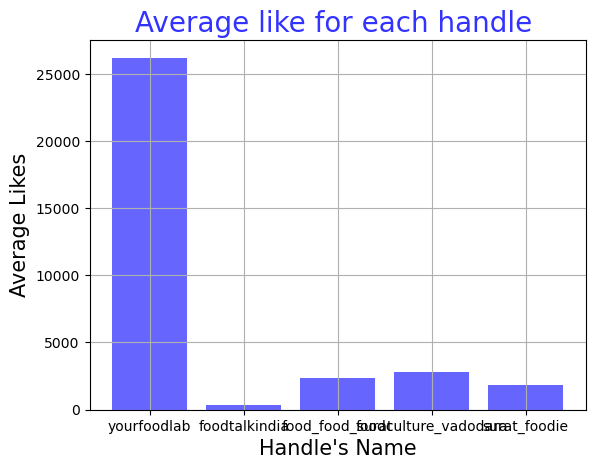

In [146]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='b',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='blue',alpha=0.8)
plt.grid()
plt.show()

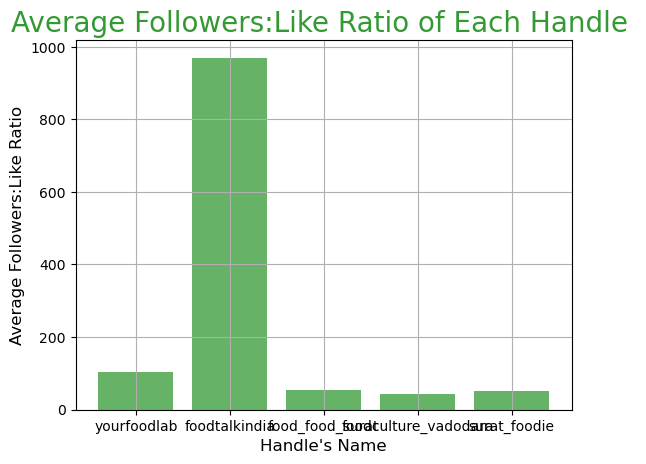

In [148]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='green',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@class="_aabd _aa8k _aanf"]/a"}
  (Session info: chrome=114.0.5735.248); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0100A813+48355]
	(No symbol) [0x00F9C4B1]
	(No symbol) [0x00EA5358]
	(No symbol) [0x00ED09A5]
	(No symbol) [0x00ED0B3B]
	(No symbol) [0x00EFE232]
	(No symbol) [0x00EEA784]
	(No symbol) [0x00EFC922]
	(No symbol) [0x00EEA536]
	(No symbol) [0x00EC82DC]
	(No symbol) [0x00EC93DD]
	GetHandleVerifier [0x0126AABD+2539405]
	GetHandleVerifier [0x012AA78F+2800735]
	GetHandleVerifier [0x012A456C+2775612]
	GetHandleVerifier [0x010951E0+616112]
	(No symbol) [0x00FA5F8C]
	(No symbol) [0x00FA2328]
	(No symbol) [0x00FA240B]
	(No symbol) [0x00F94FF7]
	BaseThreadInitThunk [0x757F7D59+25]
	RtlInitializeExceptionChain [0x76F3B79B+107]
	RtlClearBits [0x76F3B71F+191]
